In [17]:
import pandas as pd
from process_data import  get_df
import numpy as np

df = get_df()


In [18]:
# Start by identifying the top 10 handsets used by the customers
Handset_counts = df['Handset Type'].value_counts()
Handset_counts = Handset_counts .reset_index()
Handset_counts.columns = ['Handset Type', 'Count']
Handset_counts.head(10)

,Handset Type,Count
0,Huawei B528S-23A,19752
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,undefined,8987
4,Apple iPhone 7 (A1778),6326
5,Apple iPhone Se (A1723),5187
6,Apple iPhone 8 (A1905),4993
7,Apple iPhone Xr (A2105),4568
8,Samsung Galaxy S8 (Sm-G950F),4520
9,Apple iPhone X (A1901),3813


In [19]:
# identify the top 3 handset manufacturers
manufacturers_counts = df['Handset Manufacturer'].value_counts()
manufacturers_counts = manufacturers_counts .reset_index()
manufacturers_counts.columns = ['top 3 handset manufacturers', 'Count']
manufacturers_counts.head(3)

,top 3 handset manufacturers,Count
0,Apple,59565
1,Samsung,40839
2,Huawei,34423


In [28]:
# identify the top 5 handsets per top 3 handset manufacturer
# first filter the data 
filtered_df = df[df['Handset Manufacturer'].isin(['Apple', 'Samsung', 'Huawei'])]
filtered_df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Session Duration (s)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,1823640.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,1365060.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,1361760.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,1089000.0
6,1.311448e+19,2019-04-13 08:41:00,612.0,2019-04-25 08:16:00,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0,1035300.0


In [21]:
# identify the top 5 handsets per top 3 handset manufacturer
Handset_counts = filtered_df['Handset Type'].value_counts()
Handset_counts = Handset_counts .reset_index()
Handset_counts.columns = ['top 5 handsets', 'Count']
Handset_counts.head(5)

,top 5 handsets,Count
0,Huawei B528S-23A,19752
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,Apple iPhone 7 (A1778),6326
4,Apple iPhone Se (A1723),5187


In [22]:
# Convert 'Start' and 'End' columns to datetime format for better handling
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Calculate Session Duration in seconds
df['Session Duration (s)'] = (df['End'] - df['Start']).dt.total_seconds()

# List of applications for which you want to calculate total data volume
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

# Aggregate per user
user_aggregated = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Number of xDR sessions
    'Session Duration (s)': 'sum',  # Total session duration
    'Total DL (Bytes)': 'sum',  # Total download data
    'Total UL (Bytes)': 'sum',  # Total upload data
    **{f'{app} DL (Bytes)': 'sum' for app in applications},  # Total download data for each application
    **{f'{app} UL (Bytes)': 'sum' for app in applications}  # Total upload data for each application
})

# Rename columns for clarity
user_aggregated.rename(columns={'Bearer Id': 'Number of xDR sessions'}, inplace=True)

# Display the aggregated information
print(user_aggregated.head())

               Number of xDR sessions  Session Duration (s)  Total DL (Bytes)  \
MSISDN/Number                                                                   
3.360100e+10                        1              116760.0      8.426375e+08   
3.360100e+10                        1              181260.0      1.207552e+08   
3.360100e+10                        1              135000.0      5.566597e+08   
3.360101e+10                        1               49920.0      4.019932e+08   
3.360101e+10                        2               37200.0      1.363130e+09   

               Total UL (Bytes)  Social Media DL (Bytes)  Google DL (Bytes)  \
MSISDN/Number                                                                 
3.360100e+10         36053108.0                2206504.0          3337123.0   
3.360100e+10         36104459.0                2598548.0          4197697.0   
3.360100e+10         39306820.0                3148004.0          3343483.0   
3.360101e+10         20327526.0      

In [23]:
missing_values = df.isnull()
missing_values


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Session Duration (s)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
missing_values_count = df.isnull().sum()
missing_values_count

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [25]:
#  Conduct an exploratory data analysis on those data & communicate useful insights. Ensure that you 
# identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.

non_numeric_columns = df.select_dtypes(exclude=['number']).columns

df_numeric = df.drop(non_numeric_columns, axis=1)

cleaned_data = df_numeric.fillna(df_numeric.mean())


In [26]:
# Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.
cleaned_data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Session Duration (s)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08,1.046091e+05
std,2.883600e+18,288.610872,288.096693,8.103735e+04,2.144722e+10,2.438731e+12,2.237359e+13,559.342620,76.529933,23971.798635,...,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127635e+07,2.441421e+08,8.103738e+04
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,7.140000e+03
25%,7.349883e+18,250.000000,251.000000,5.744200e+04,2.082014e+14,3.365151e+10,3.546261e+13,35.000000,3.000000,43.000000,...,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08,5.742000e+04
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366380e+10,3.572241e+13,54.000000,7.000000,63.000000,...,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08,8.640000e+04
75%,1.304243e+19,749.000000,750.000000,1.324300e+05,2.082018e+14,3.368473e+10,8.611970e+13,109.795706,17.662883,19710.000000,...,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08,1.324200e+05
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08,1.859340e+06


In [27]:

# Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative 
# variable and provide useful interpretation. 

quantitative_columns = cleaned_data.select_dtypes(include=['number']).columns

dispersion_data = pd.DataFrame(index=quantitative_columns, columns=['Range', 'Variance', 'Standard Deviation', 'IQR'])

for column in quantitative_columns:
    data = cleaned_data[column].dropna() 
   
    data_range = data.max() - data.min()
    
    data_variance = data.var()
    
    data_std_dev = data.std()
    
    # Interquartile Range (IQR)
    data_iqr = data.quantile(0.75) - data.quantile(0.25)
    
    # Store values in the DataFrame
    dispersion_data.loc[column] = [data_range, data_variance, data_std_dev, data_iqr]

dispersion_data

,Range,Variance,Standard Deviation,IQR
Bearer Id,6269003648590669824.0,8315146431338349632234442312803942400.0,2883599561544277504.0,5692542731480581120.0
Start ms,999.0,83296.235554,288.610872,499.0
End ms,999.0,82999.704445,288.096693,499.0
Dur. (ms),1852194.0,6567052314.333345,81037.351353,74988.0
IMSI,10027194860177.0,459983443424385499136.0,21447224608.894867,370342358.0
MSISDN/Number,882363507487729.0,5947410209613010832457728.0,2438731270479.183105,33222169.0
IMEI,98561186125774.0,500577558786728881719083008.0,22373590654759.214844,50657094738467.0
Avg RTT DL (ms),96923.0,312864.1662,559.34262,74.795706
Avg RTT UL (ms),7120.0,5856.830663,76.529933,14.662883
Avg Bearer TP DL (kbps),378160.0,574647129.800257,23971.798635,19667.0


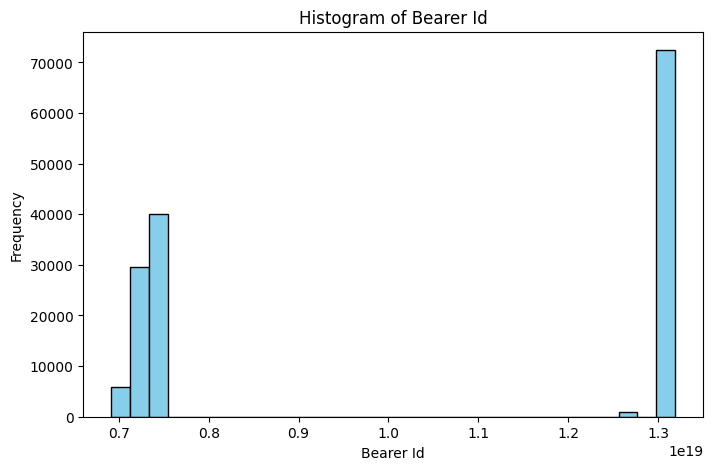

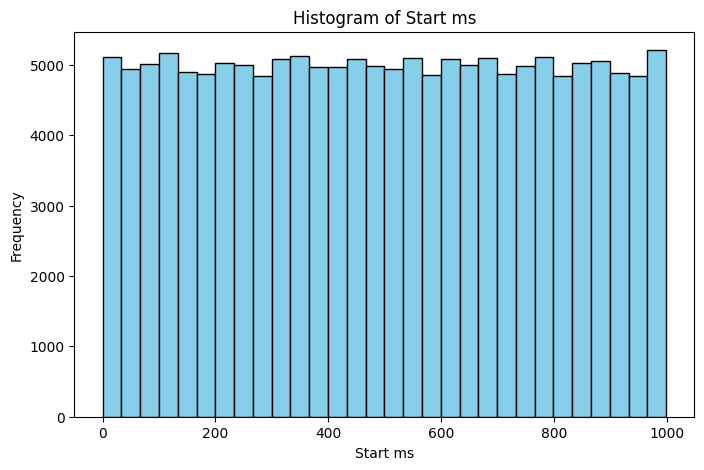

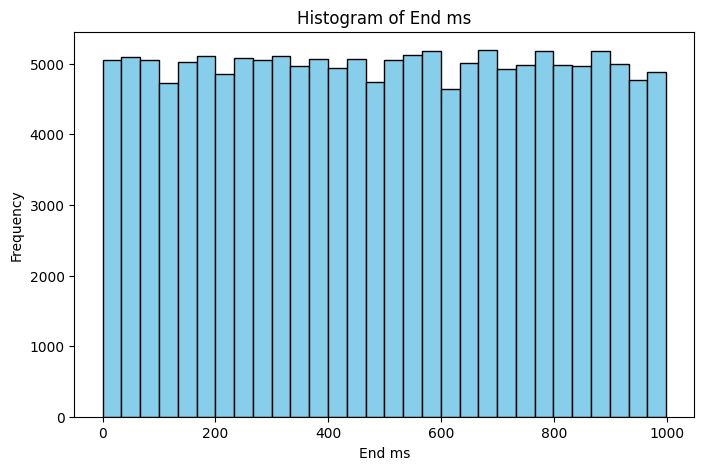

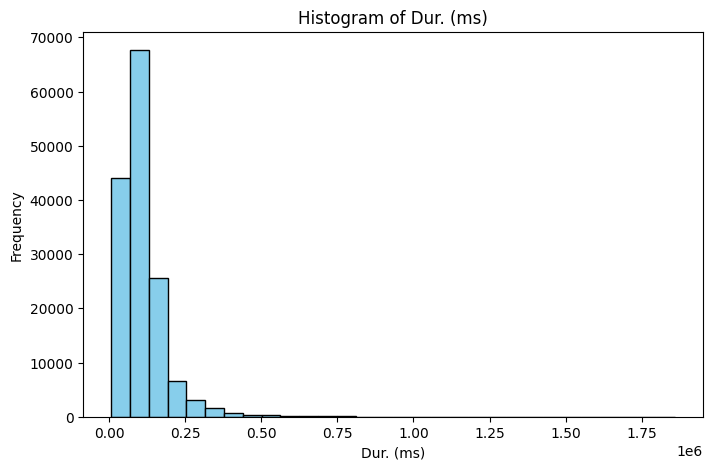

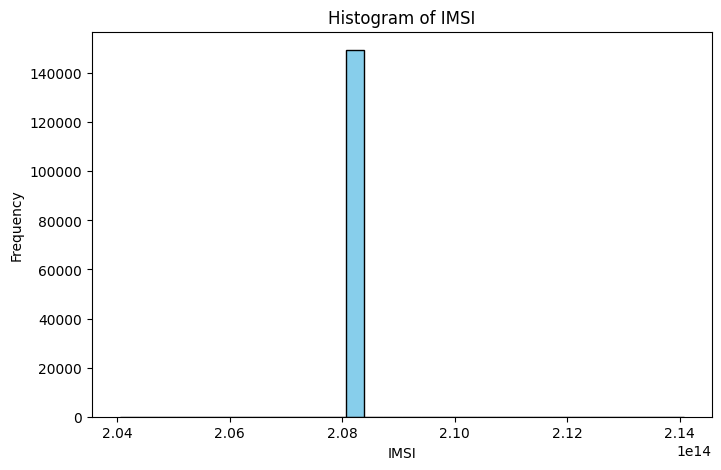

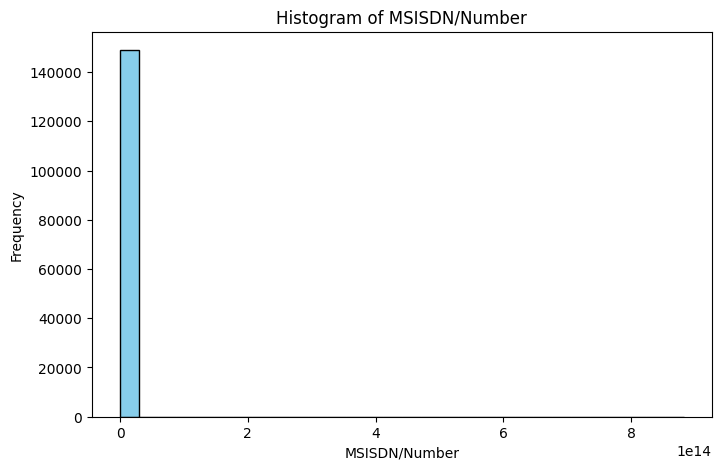

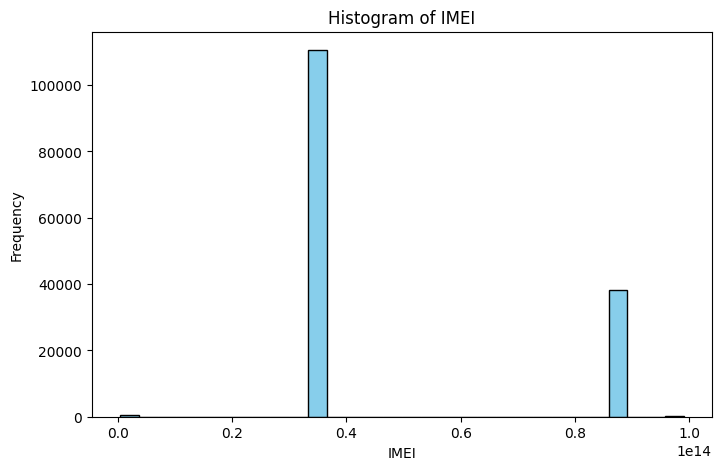

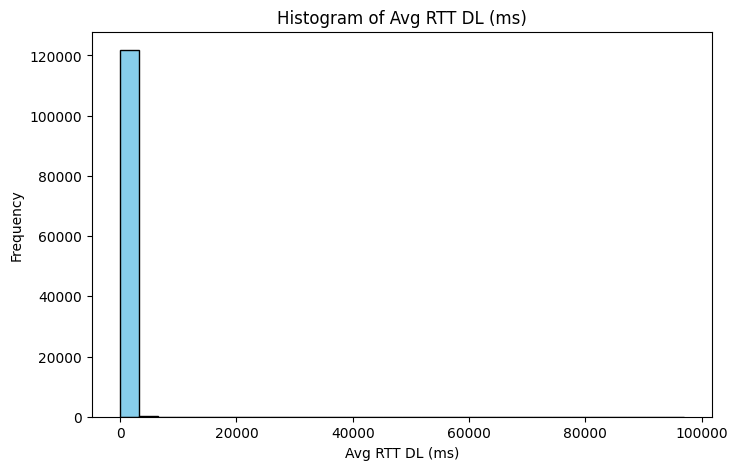

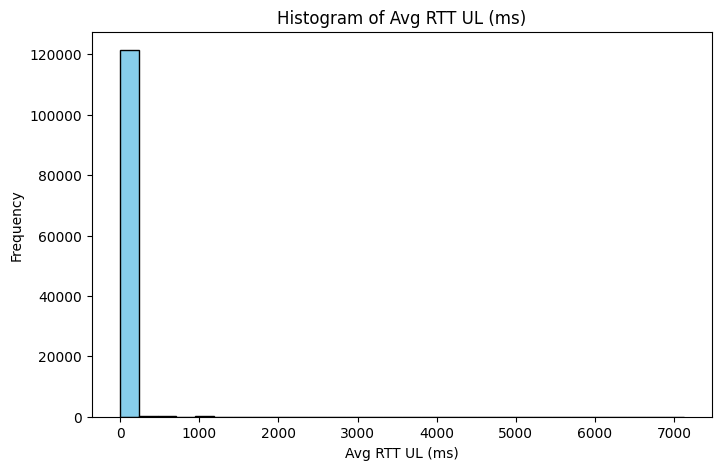

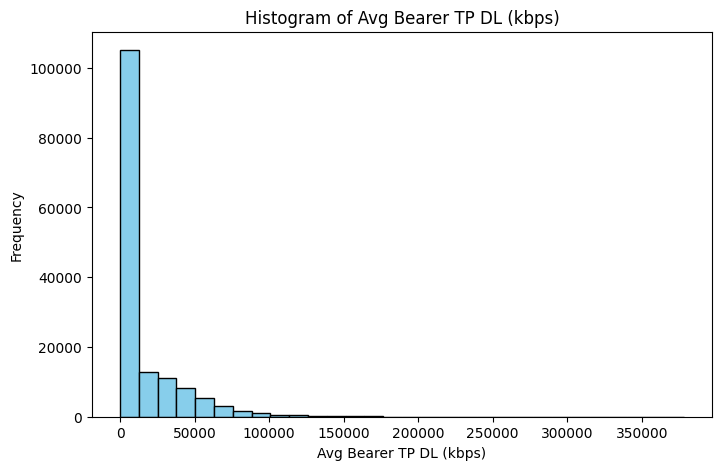

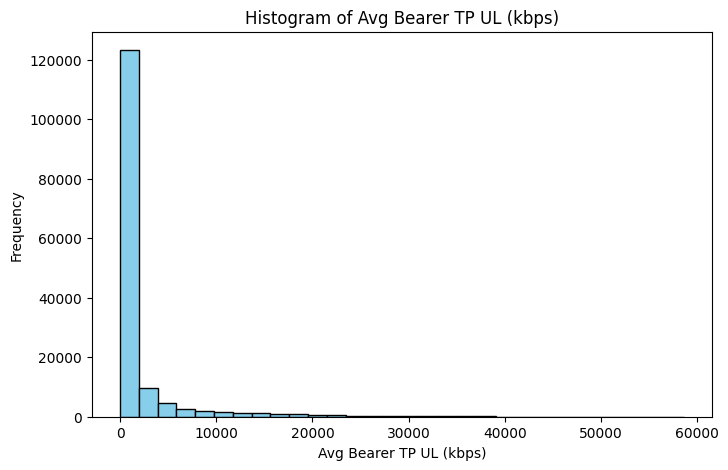

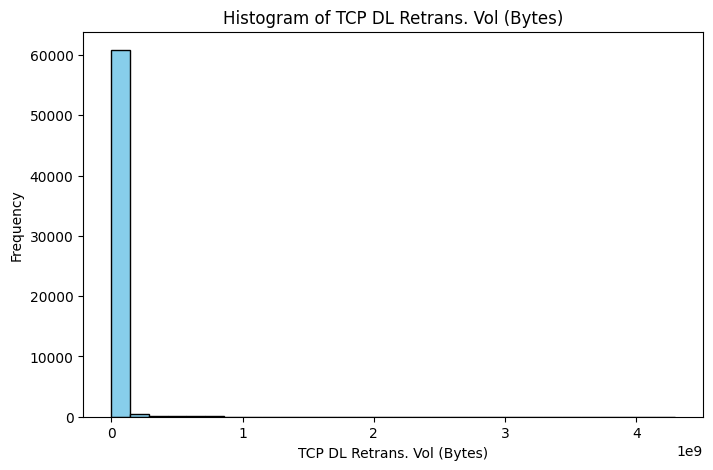

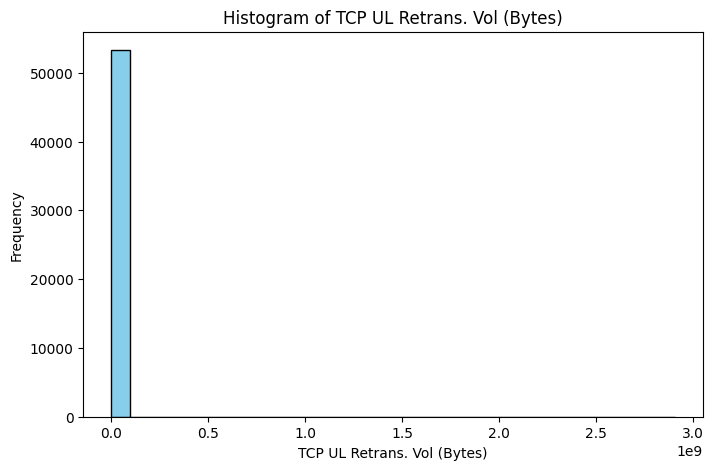

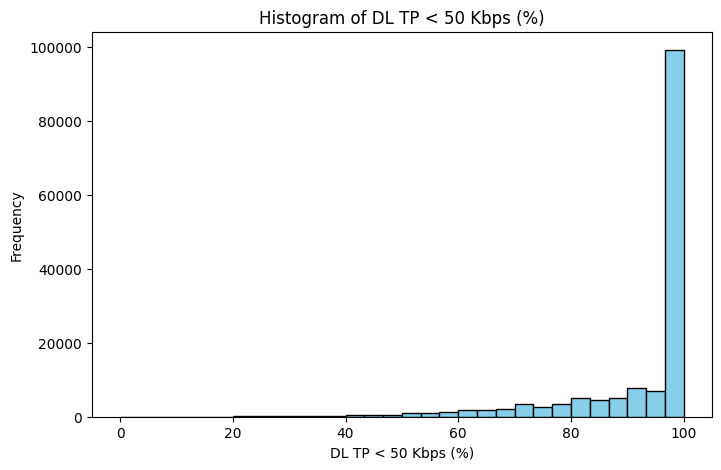

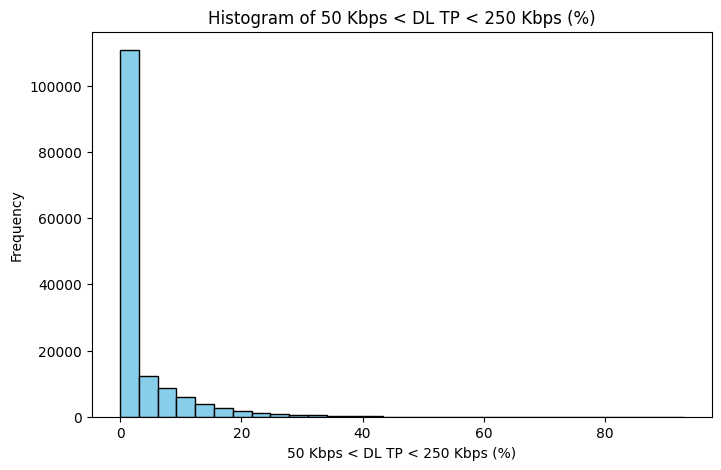

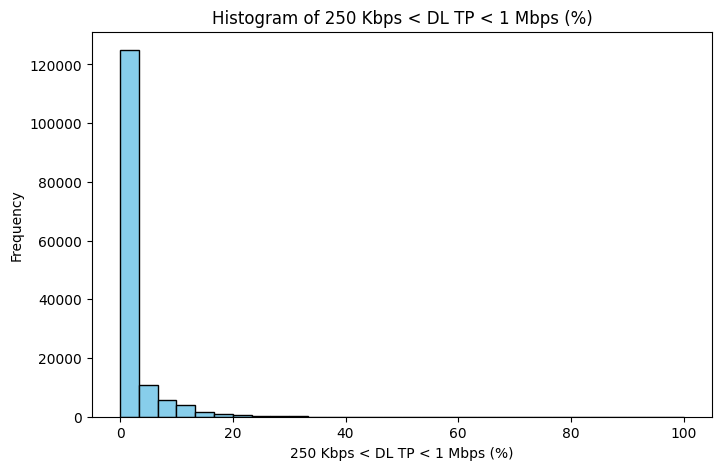

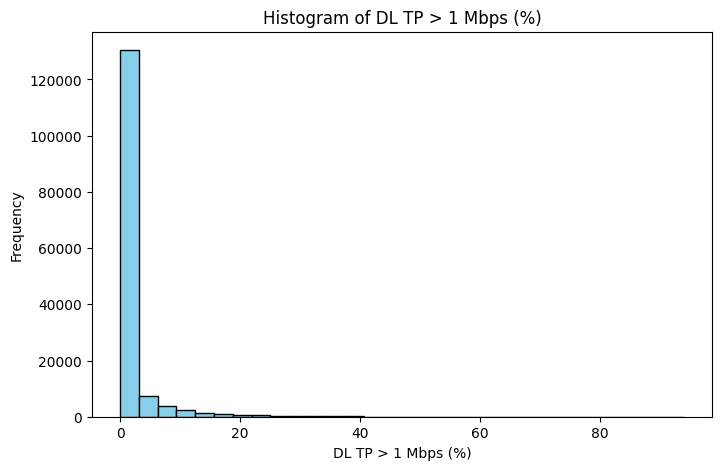

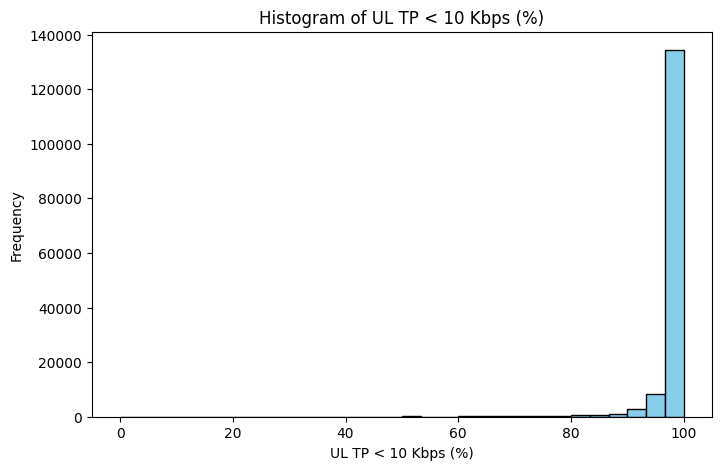

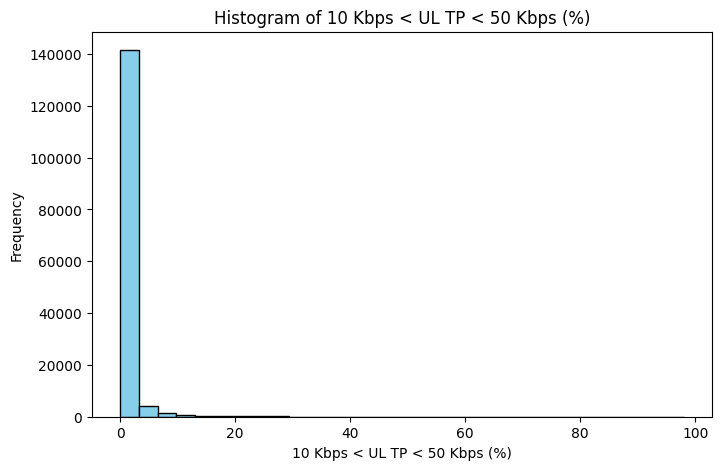

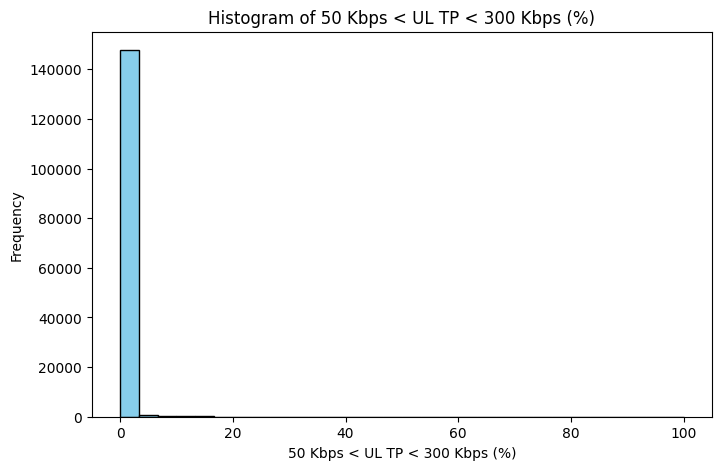

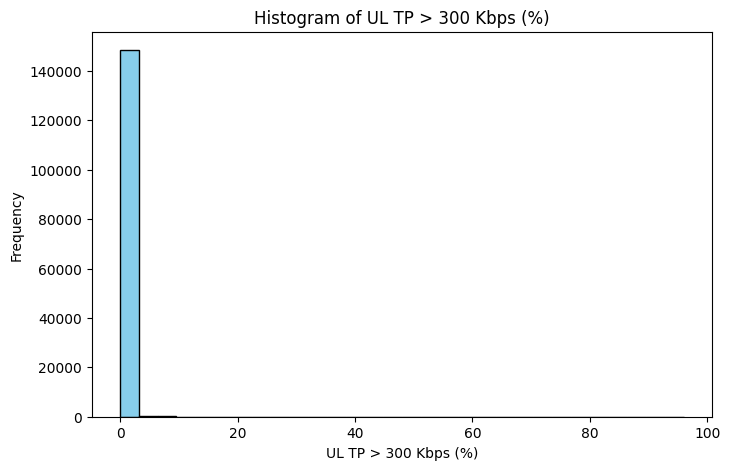

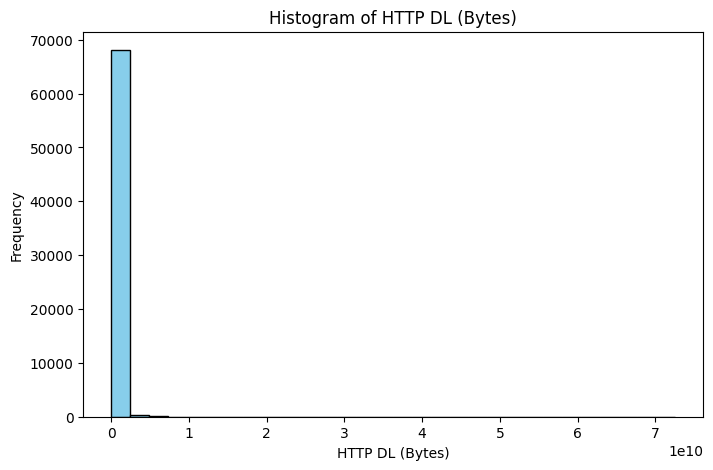

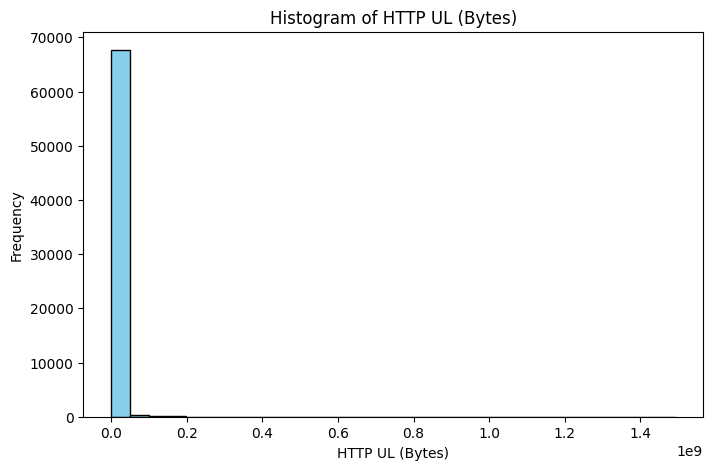

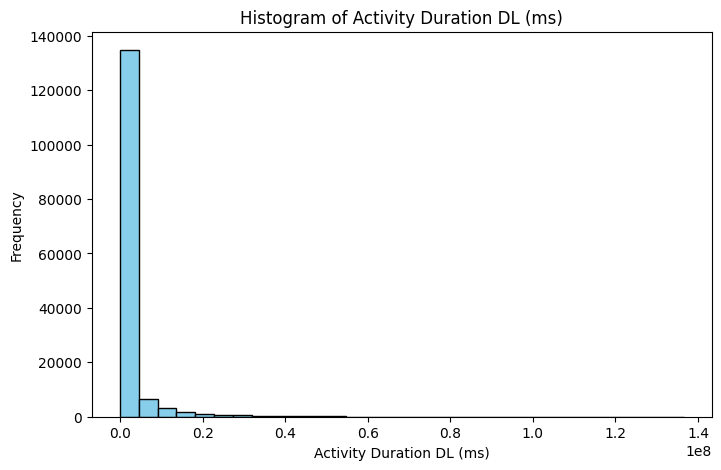

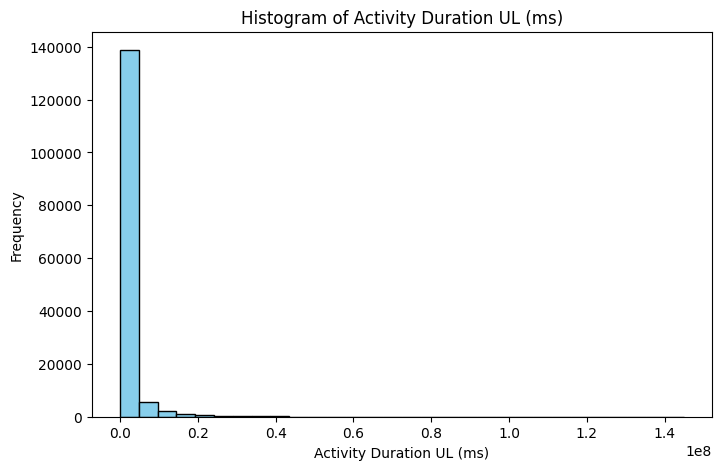

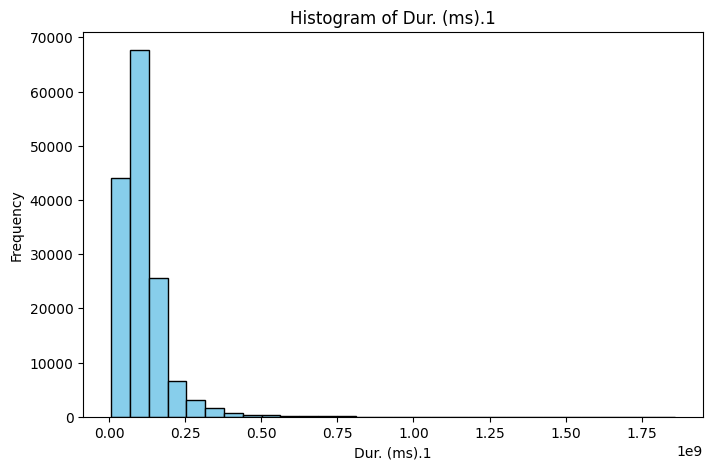

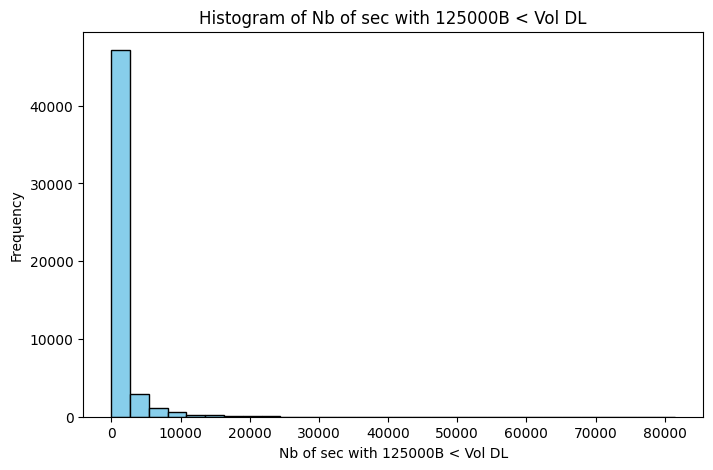

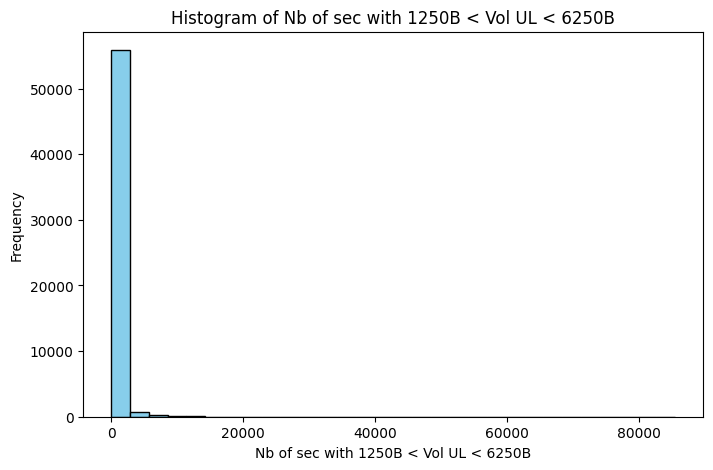

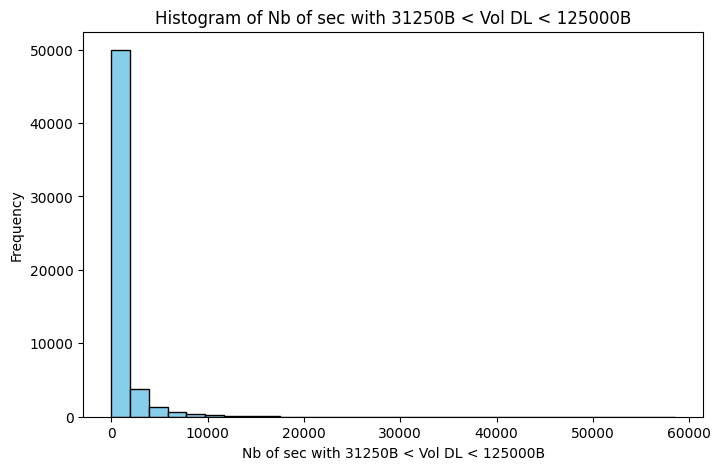

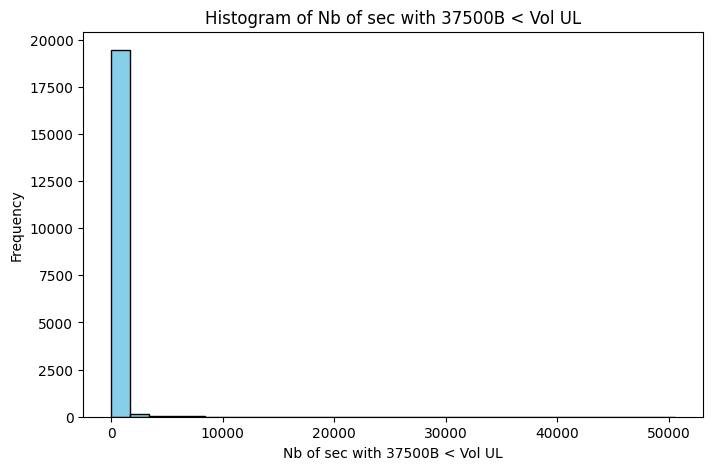

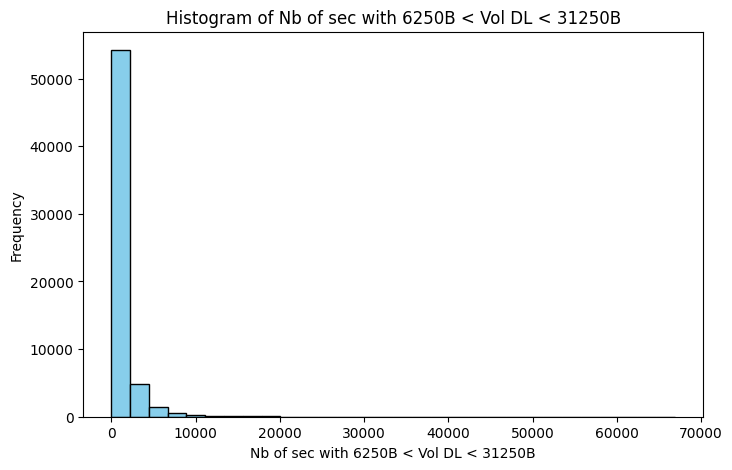

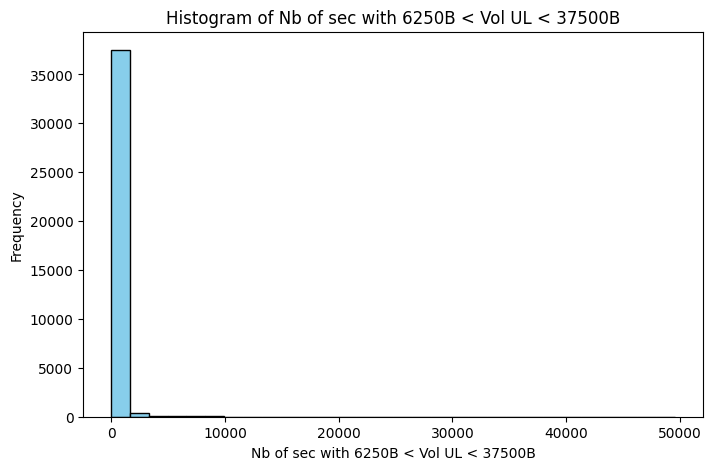

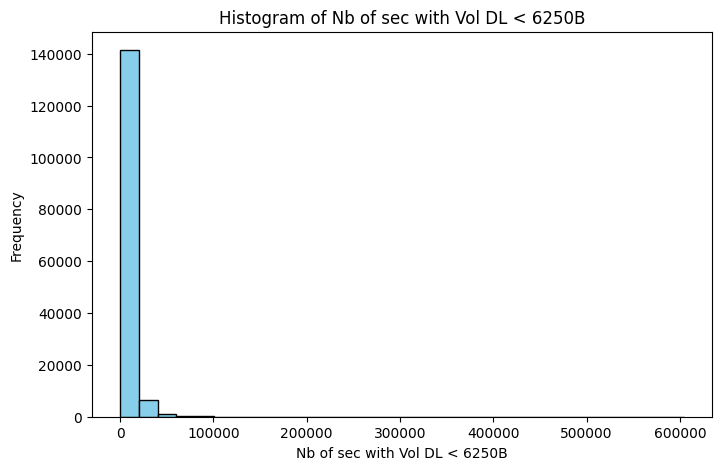

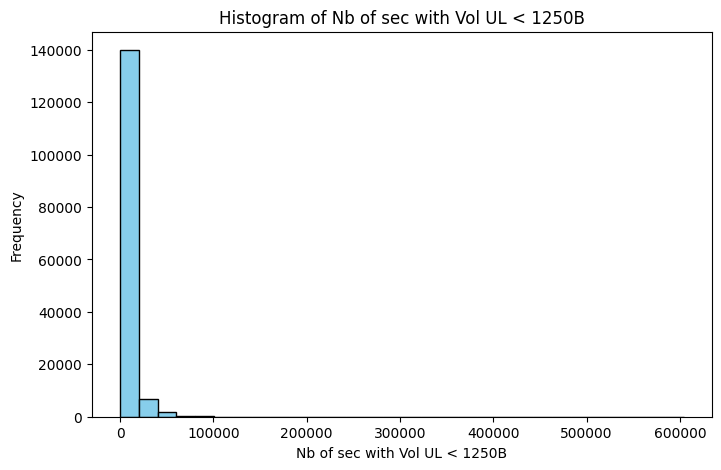

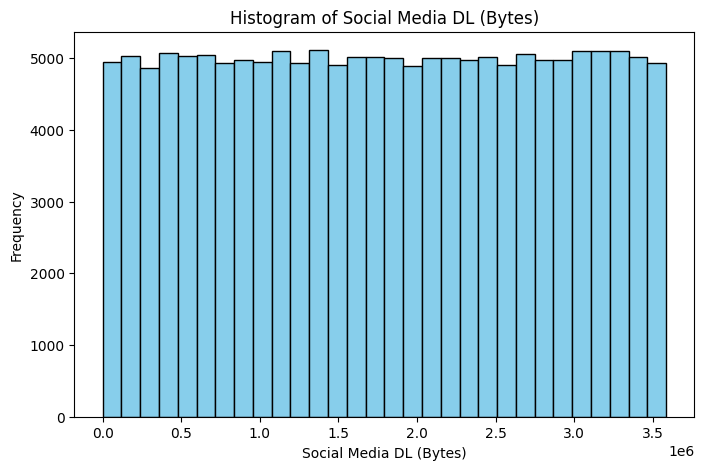

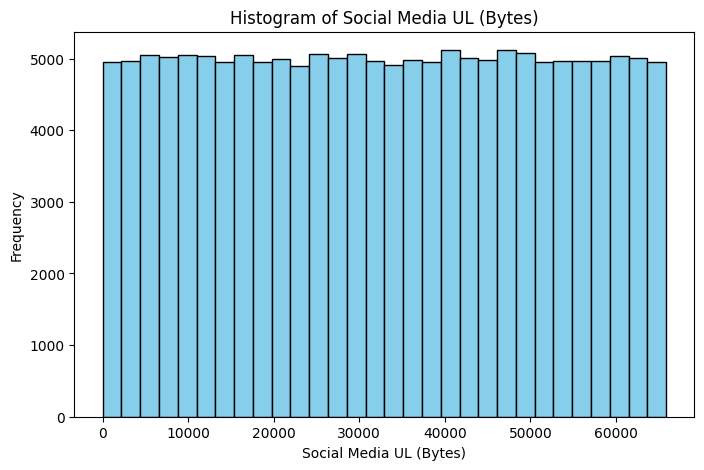

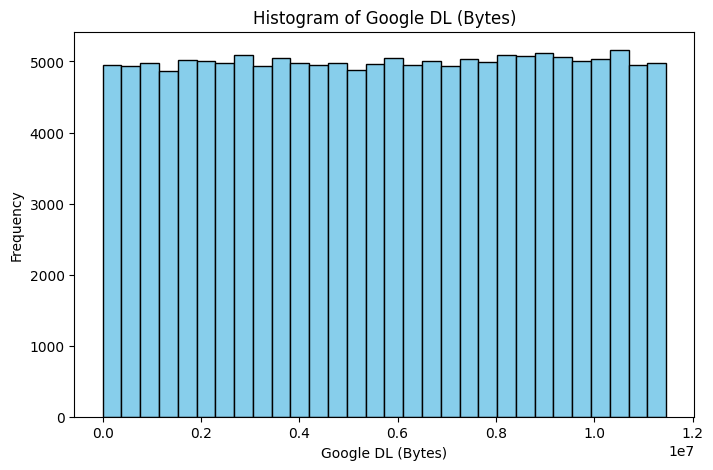

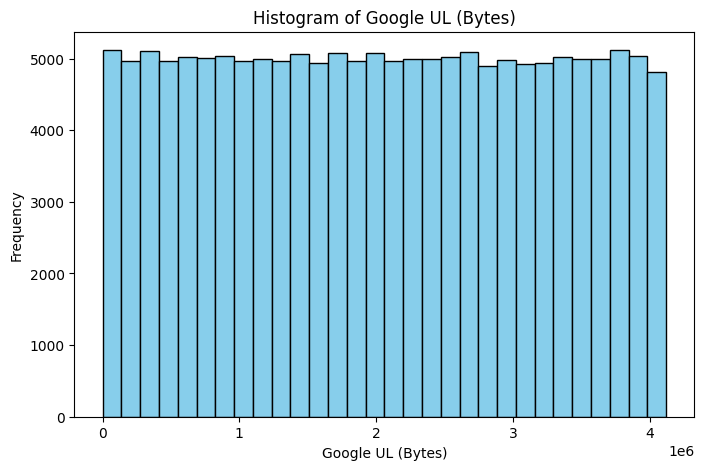

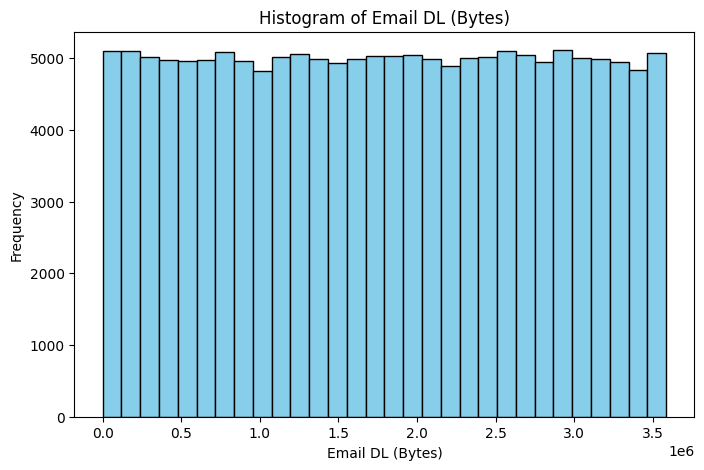

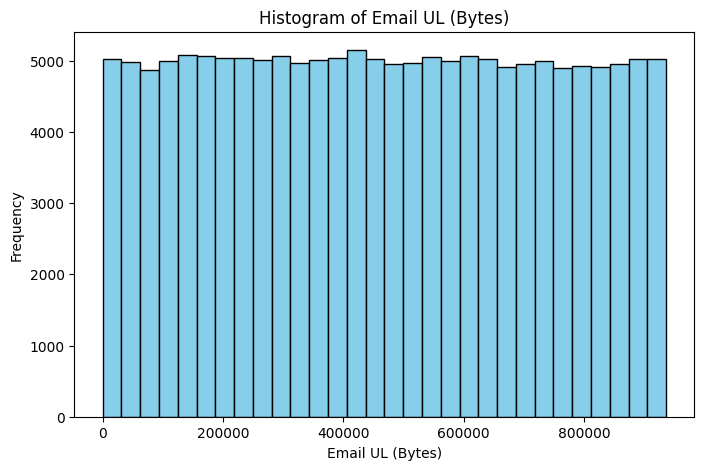

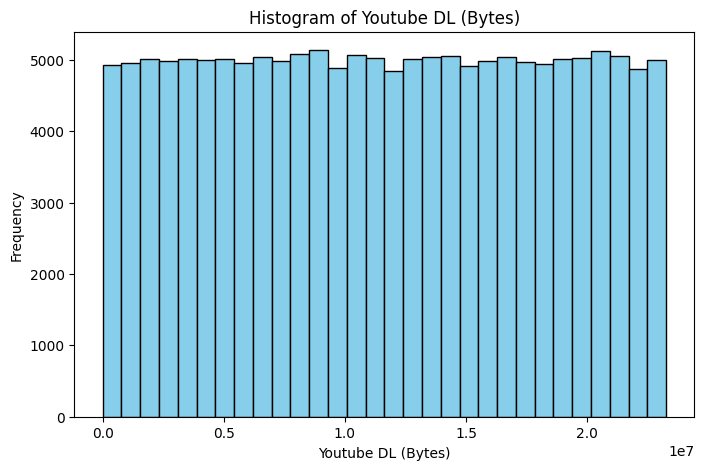

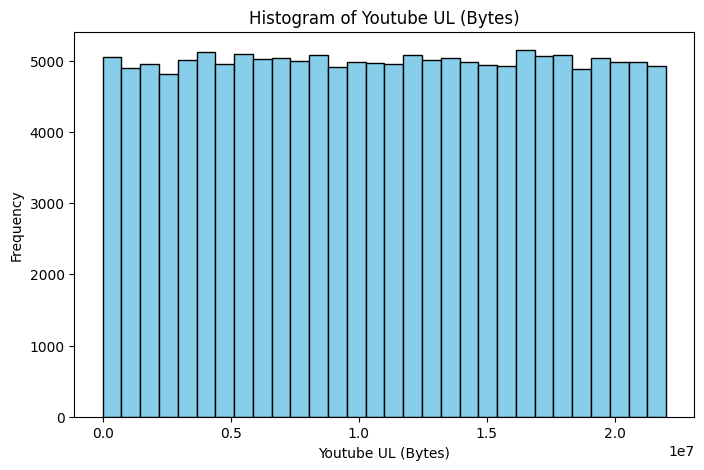

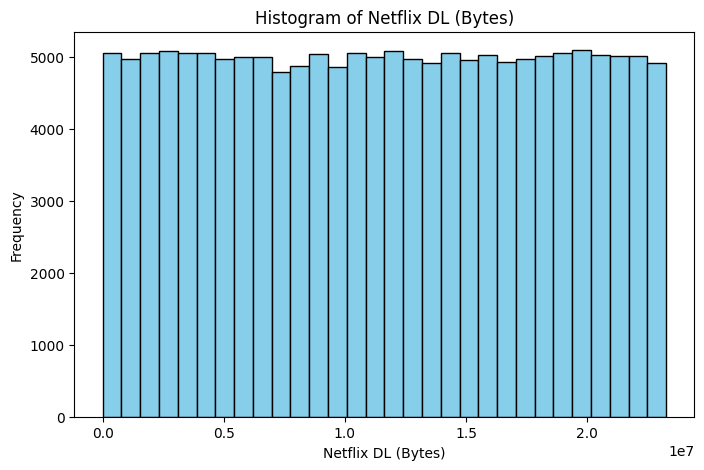

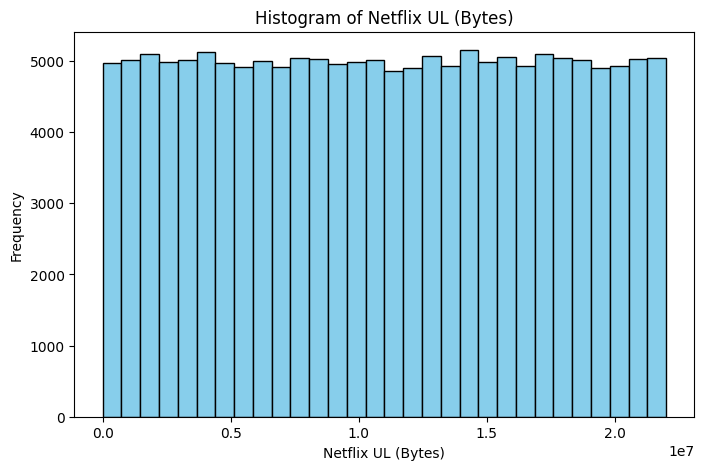

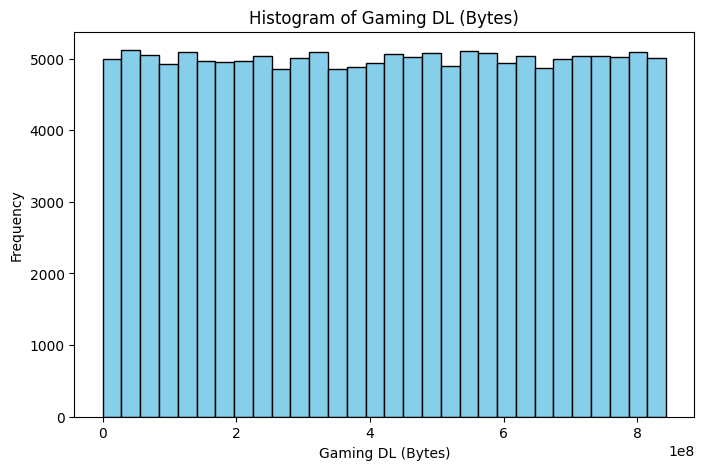

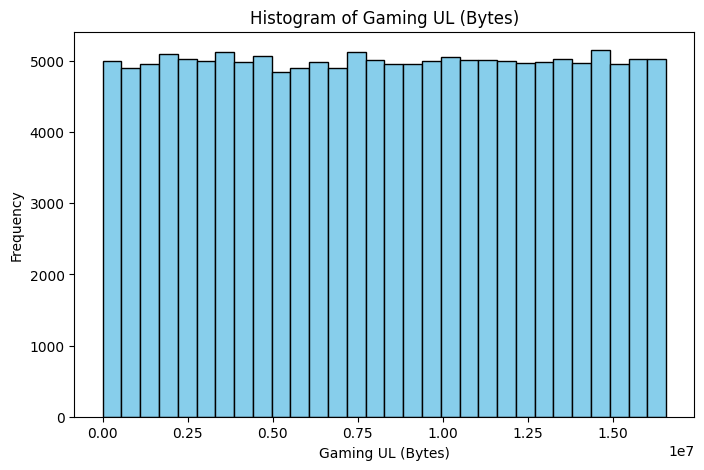

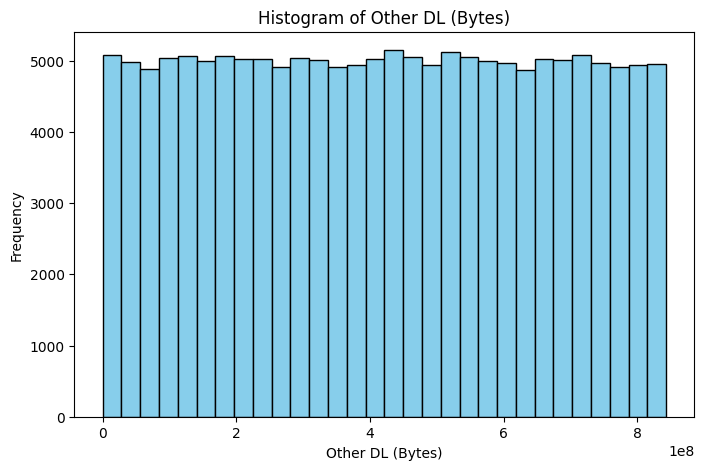

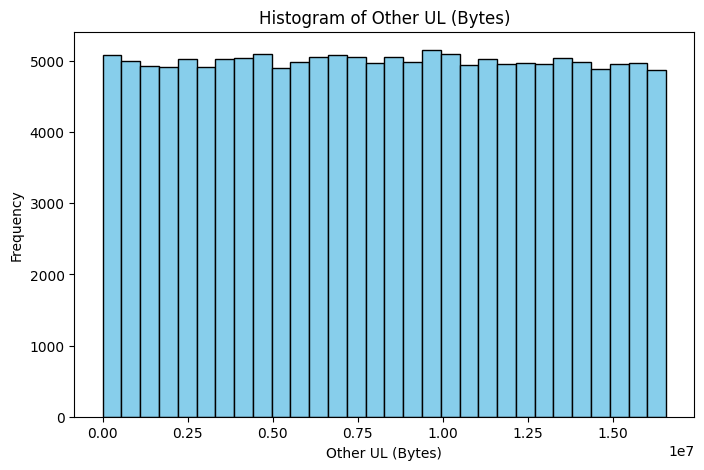

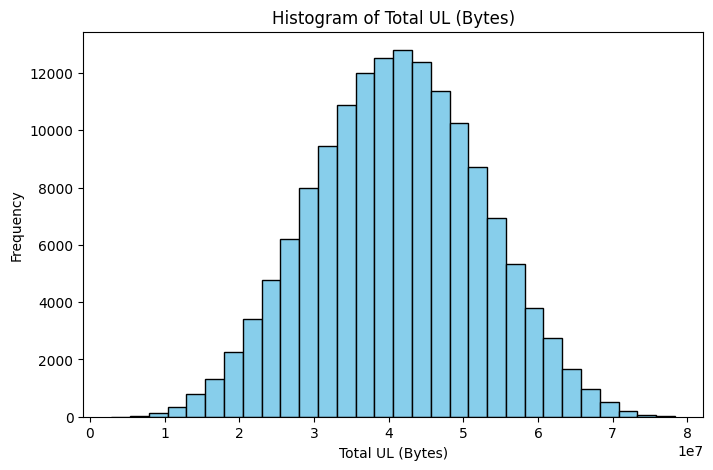

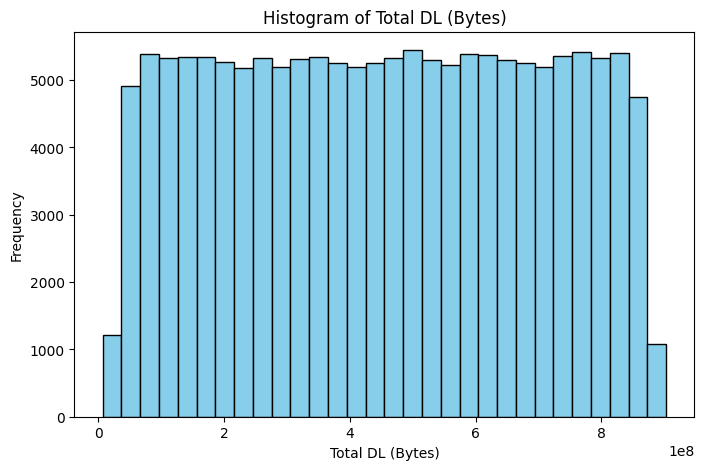

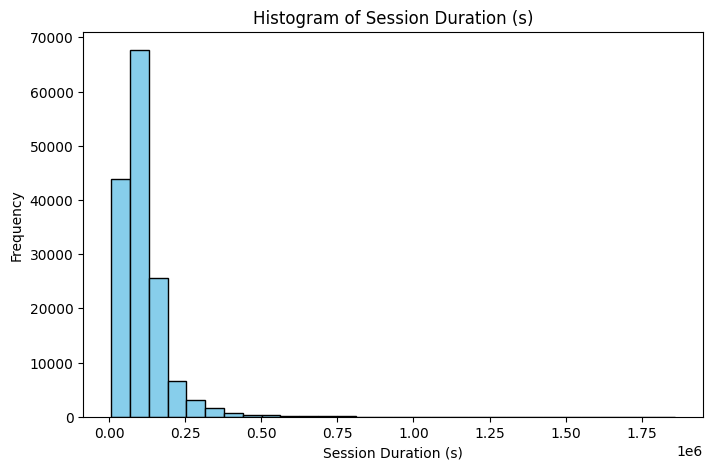

In [30]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include='number').columns

for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [29]:
!pip install matplotlib 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 1.2 MB/s eta 0:00:0000:0100:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
  Using cached contourpy-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (310 kB)
  Using cached fonttools-4.46.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
